In [5]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [75]:
im_dir = "samples/duck.jpg"
img = cv2.imread(im_dir)
img = img.astype(np.float32)/255

<h1>Base Image</h1>

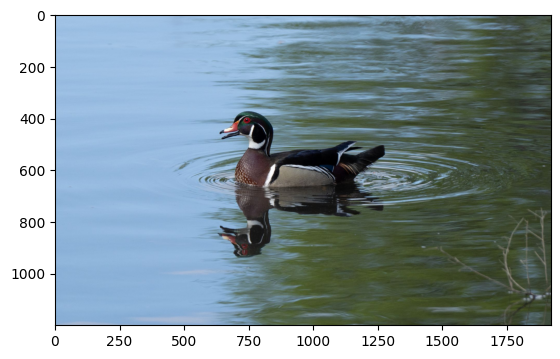

In [76]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

<h1>Noisy Image</h1>

In [77]:
mu = 0
sigma = 0.5
noise = np.random.normal(mu, sigma, size=img.shape)
img_noisy = img + noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2351613..3.227749].


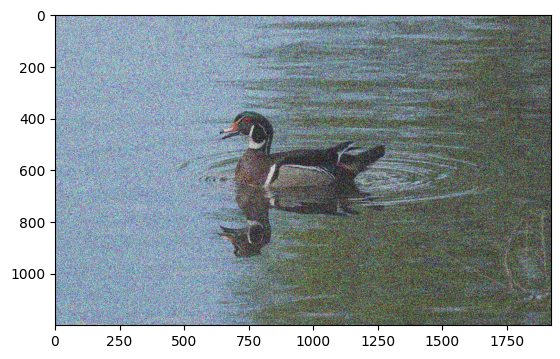

In [78]:
img_rgb = cv2.cvtColor(np.float32(img_noisy), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

<h1>Blurred Image</h1>

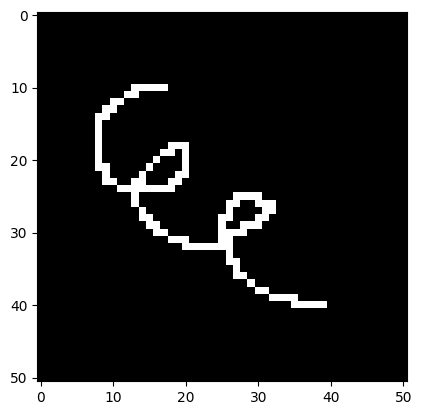

In [112]:
kernel_dir = "kernels/kernel_51x51.png"
kernel = cv2.imread(kernel_dir, cv2.IMREAD_GRAYSCALE)
kernel = kernel.astype(np.float32)/255
kernel = kernel/np.sum(kernel)
plt.imshow(kernel, cmap='gray')

In [113]:
img_blurry_b = scipy.ndimage.convolve(img[:,:,0], kernel, mode='mirror')
img_blurry_g = scipy.ndimage.convolve(img[:,:,1], kernel, mode='mirror')
img_blurry_r = scipy.ndimage.convolve(img[:,:,2], kernel, mode='mirror')
img_blurry = np.zeros(img.shape)
img_blurry[:,:,0] = img_blurry_b
img_blurry[:,:,1] = img_blurry_g
img_blurry[:,:,2] = img_blurry_r

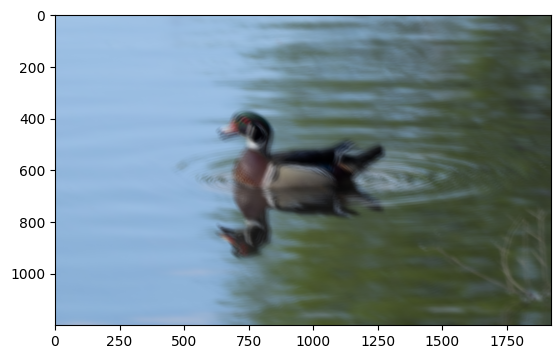

In [114]:
img_rgb = cv2.cvtColor(np.float32(img_blurry), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)